In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# Load the California Housing Dataset from CSV
data = pd.read_csv('/content/sample_data/california_housing_train.csv')


In [23]:
# Prepare the data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

In [28]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")


Linear Regression Mean Squared Error: 4634658406.223357


In [29]:
# Neural Network model using TensorFlow and Keras
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

In [32]:
# Make predictions
y_pred_nn = model.predict(X_test_scaled).flatten()

107/107 [==============================] - 1s 2ms/step


In [33]:
# Evaluate Neural Network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn}")

Neural Network Mean Squared Error: 4197844839.433924


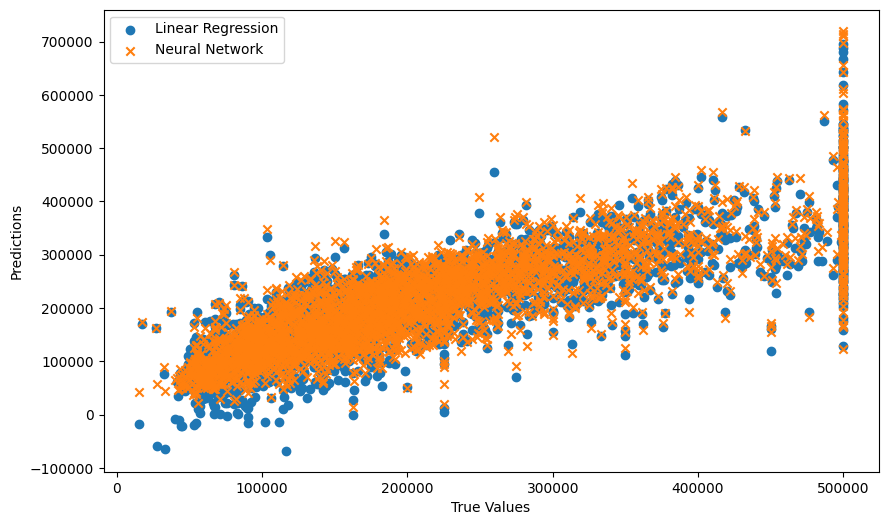

In [34]:
# Compare predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', marker='o')
plt.scatter(y_test, y_pred_nn, label='Neural Network', marker='x')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()